## Shape-based Evaluation of Epidemic Forecasts



## Definitions

Shapelet : Shapelets are defined as “subsequences that are in some sense maximally representative of a class”. Informally, if we assume a binary classification setting, a shapelet is discriminant if it is present in most series of one class and absent from series of the other class.<br>

In this work, we have used 6 shapelets which depict various stages in a pandemic wave

__Flat__: [1, 1, 1, 1, 1] <br>
__Stable-inc__: [1 ,2, 3, 4, 5], i.e., linear<br>
__Stable-dec__: [5, 4, 3, 2, 1], i.e., linear but decreasing<br>
__Surge__: [exp(-1/2) ,exp(0/2), exp(1/2), exp(2/2), exp(3/2)], i.e., like exp(x)<br>
__Peaking__: - [exp(1/2) ,exp(0/2) ,exp(-1/2) ,exp(-2/2), exp(-3/2)], i.e., like -exp(-x)<br>
__At/near peak__:  - [exp(-1/2), exp(0/2), exp(1/2), exp(2/2), exp(3/2)], i.e., like -exp(x)


### Pearson Correlation:

<img src="https://editor.analyticsvidhya.com/uploads/39170Formula.JPG" width="400" height="500">

### Cosine Similarity
cosine similarity for comparing the two vectors, which is defined as follows:
\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}




## Broard Steps

For Cases and Deaths,

* Find the similarity of the ground truth with our shapelets. This will give us a vector
* Find the similarity of the model forecasts with our shapelets. This will give us another vector
* Take the cosine similarity between the two (negative inputs are okay!). The similarity between the classes will be inherently captured
* Take the mean of pairwise cosine similarity between the models. This will give us the agreement between models
*Add another "Shapelet Ensemble Model" whose vector output is the mean of the model vectors. This is analogous to the majority classifier.

## Development Code Begins

### Library Imports


### Define Paths and hyper Params
### Load config variables
### run preprocessing steps

Process will run for Cases
2020-01-22 00:00:00
2020-06-27 00:00:00
**


/Users/satwant/Documents/Anaconda3/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/satwant/Documents/Anaconda3/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Using Pickle file already gnerated in the past
Total Number of Eligible Models in Repository ---> 17
Total Number of Iterations 2432
Total number of impuations 16
Dec          1375
Surge         842
Inc           732
Peaking       593
Near Peak     552
Flat          181
Name: Label_Actual, dtype: int64
Dec          70.2500
Peaking      26.2500
Inc          13.8750
Near Peak    12.2500
Surge        10.3125
Flat          5.3125
Name: Predicted, dtype: float64
For the State California Top 3 performing Models are --> 'FH_BPagano_RtDriven', 'FH_Karlen_pypm', 'FH_LANL_GrowthRate'
For the State Florida Top 3 performing Models are --> 'FH_CU_nochange', 'FH_Karlen_pypm', 'USC_SI_kJalpha'


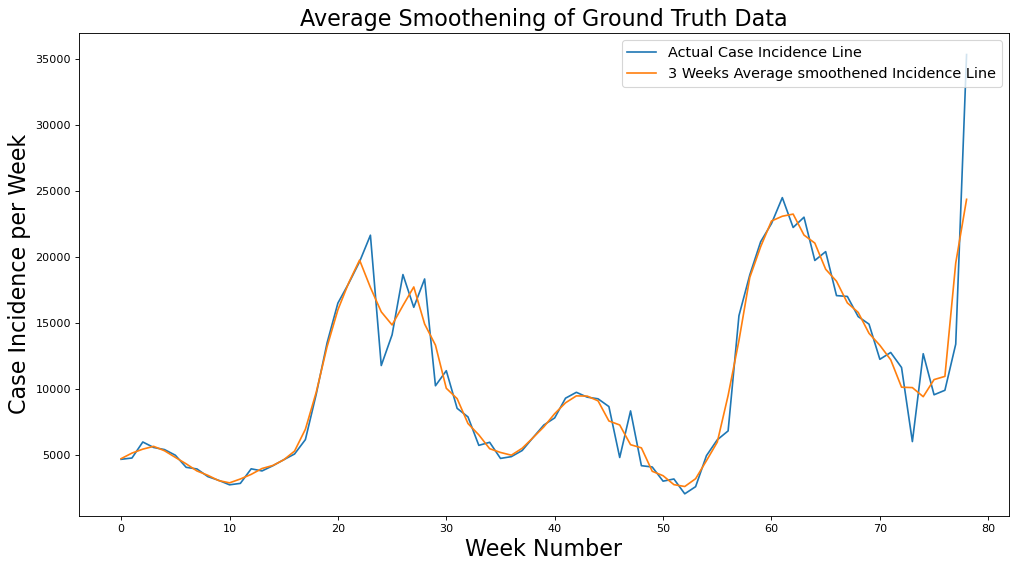

In [1]:
from configs import *

%run preprocessing.py

### Visualization 1

#### This plot contains 4 subplots<Br><Br>

1) Actual Incidence plot for state over time - Death/ cases <Br><Br>
2) Agreement Score over time for State<Br><Br>
3) Shapelet / COvid Hub Ensemble Model COmparision - Cosine Score as criterion<Br><Br>
4) Evaluaiton of Shapelet/Covid emseble wrt to model agreement score to see confidence - Cosine score of Both models plotted against all models agreement score as Scatter plot<Br><Br>

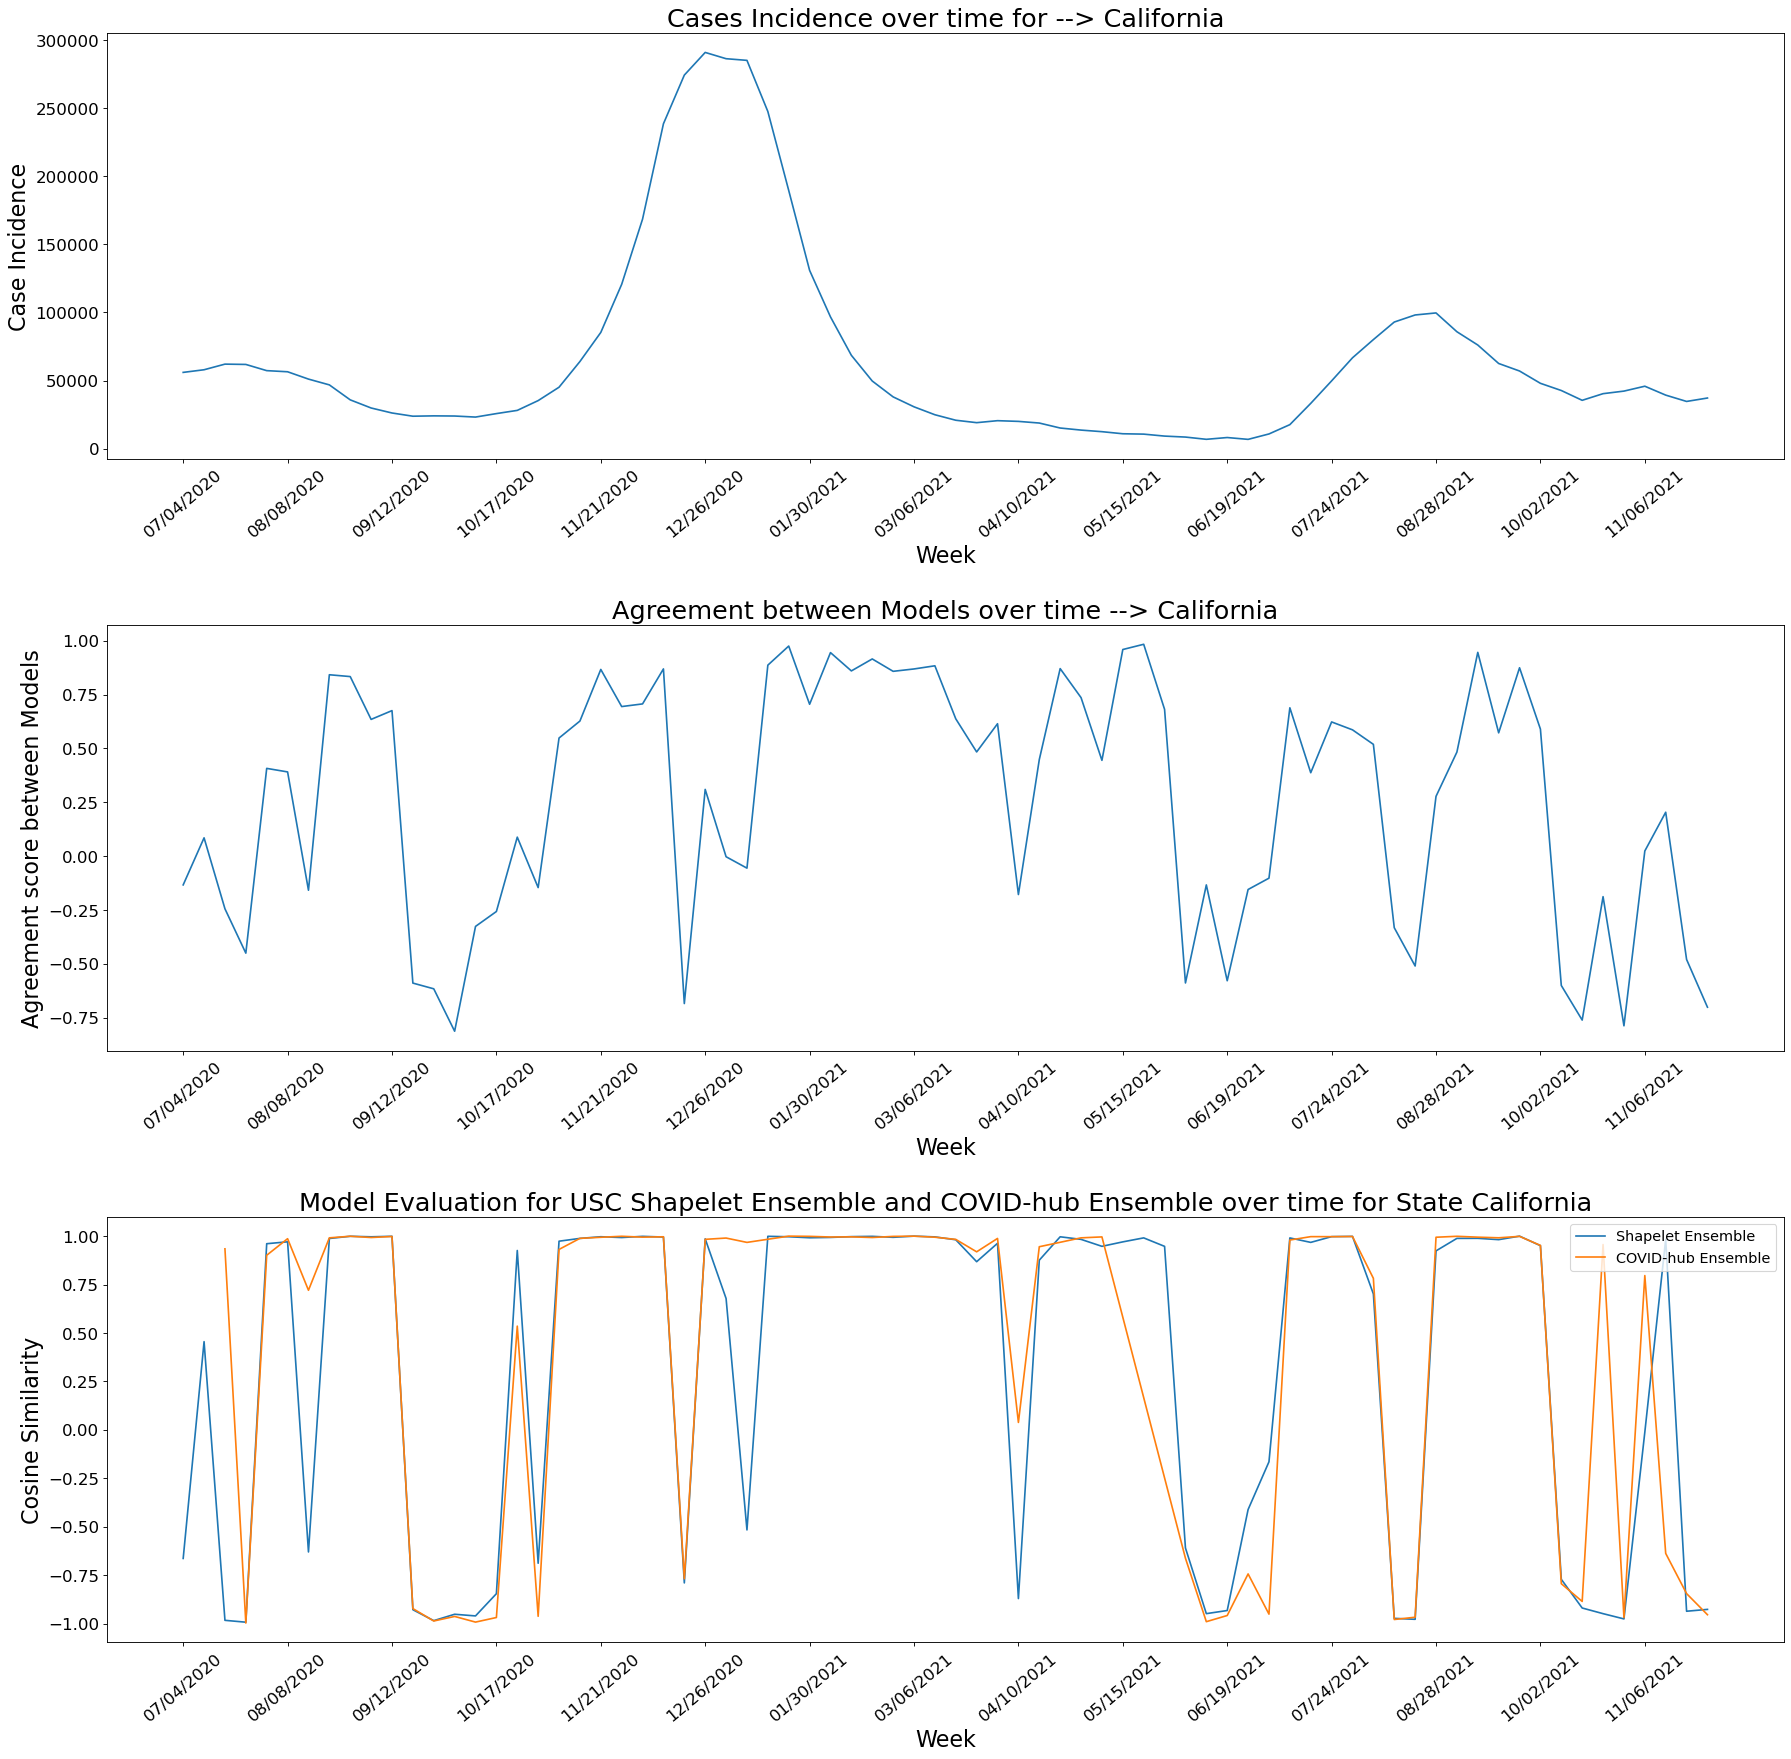

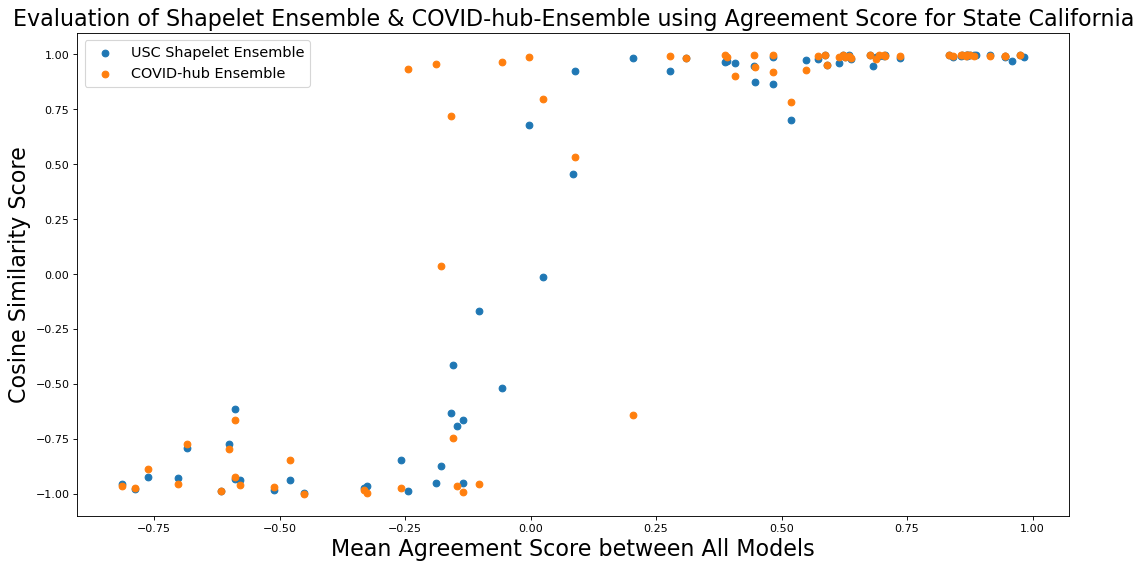

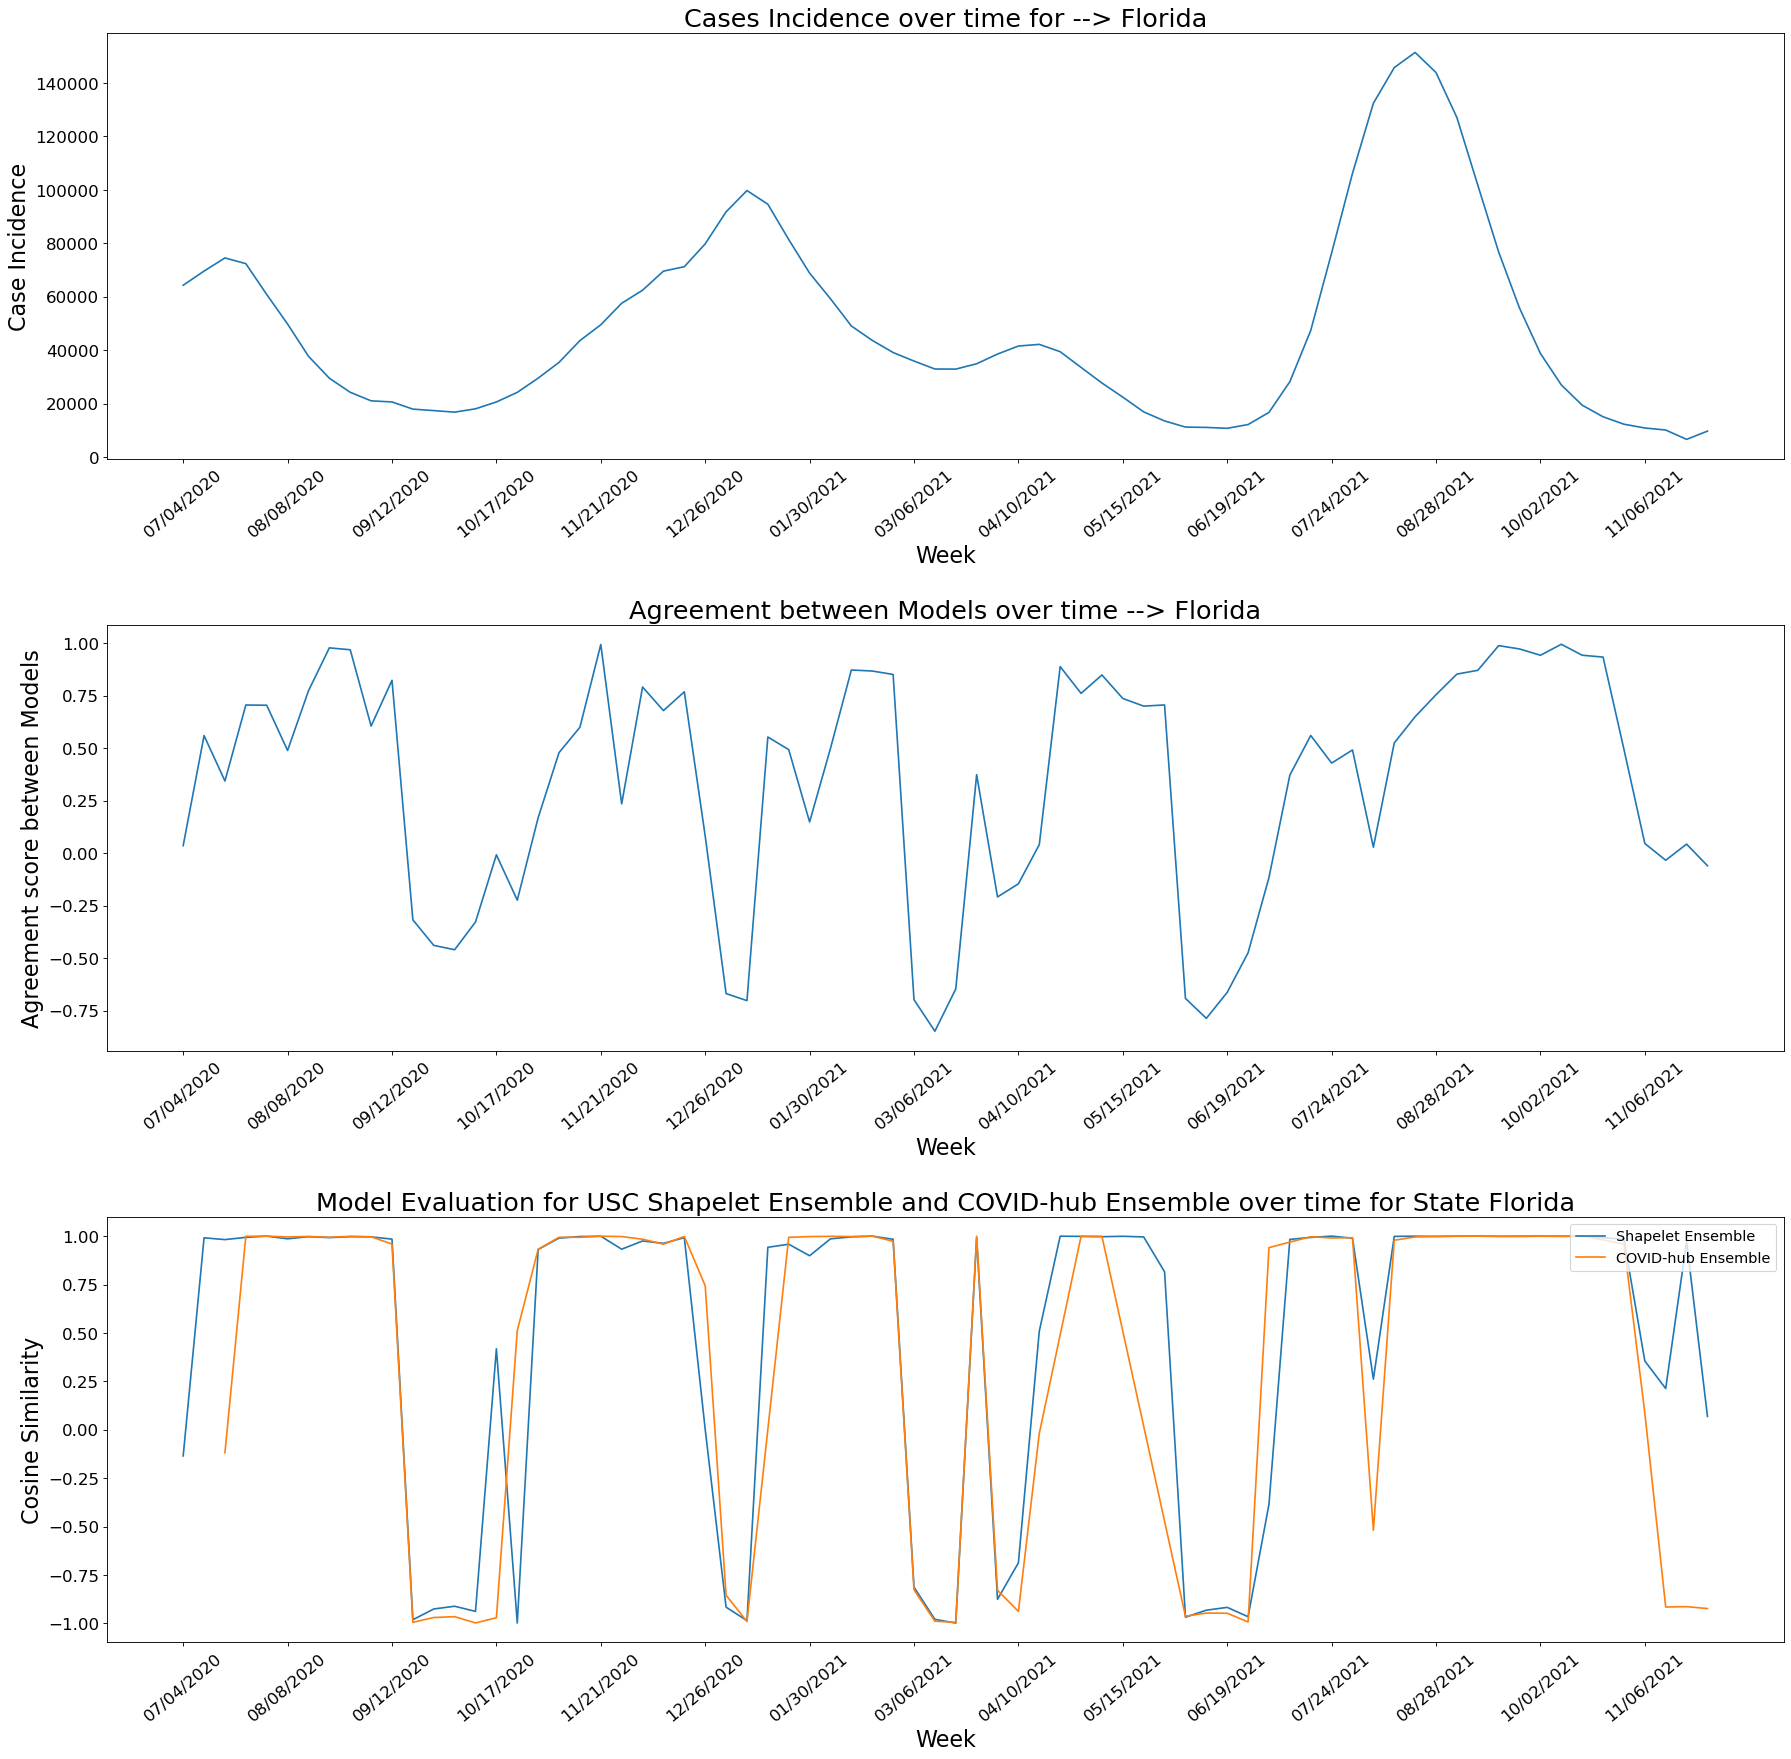

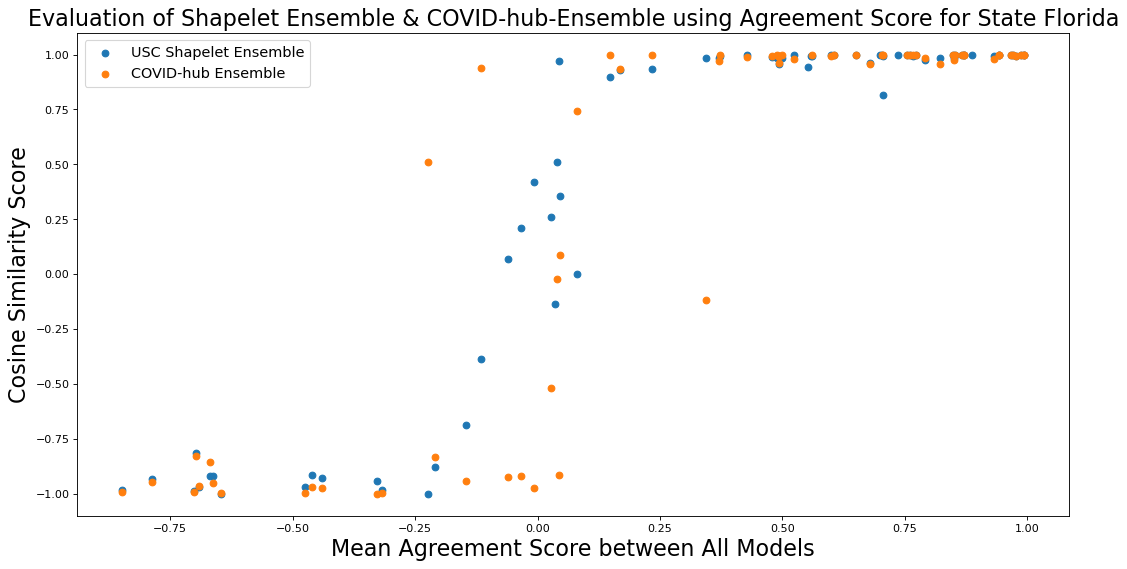

In [2]:
state_lst = State_list_plotting[:]

for state in state_lst:
    
    scatter_plot_x = None
    
    Scatter_plot_y1 = None
    
    Scatter_plot_y2 = None
    
    model = "USC shapelet-ensemble"
#     if state not in ['California','United States']:
#         continue
    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    fig, axs = plt.subplots(3,figsize=(25,24 ), dpi=80)

    fig.tight_layout(pad=13.0)

    subset_data = plot_results_softmax[plot_results_softmax['State_x']==state].drop_duplicates(['Week Number','Label_Actual_x'])
    Actual_Case_cnt = (subset_data['Covid_case_count']/subset_data['Count_overall']).to_list()

    Predicted_label = subset_data['Predicted'].to_list()

    Actual_Label = subset_data['Label_Actual_x'].to_list()

    Week_nbr = subset_data['Week Number'].to_list()
    str_week_int = []
    str_week = []
    for i in range(0,len(Week_nbr),5):
        str_week_int.append(Week_nbr[i])
        str_week.append(date_formatting(Week_nbr[i]))

#         print(len(Week_nbr))

    axs[0].plot(Week_nbr,Actual_Case_cnt)
    axs[0].set_xlabel('Week', fontsize = 20)
    axs[0].set_ylabel('Case Incidence', fontsize = 20)
    
    
    
    
#     axs[0].set(xlabel="Week", ylabel="Covid Case Count")

    axs[0].set_title(Runtype+" Incidence over time for --> "+state,fontsize=23)
    axs[0].set_xticks(str_week_int)
    axs[0].set_xticklabels(str_week,rotation=40,fontsize=15)
    axs[0].yaxis.set_tick_params(labelsize=15)
#     axs[0].set_yticklabels(fontsize=13)
#     axs[0].set_yticks(Actual_Case_cnt)
#     axs[0].set_yticklabels(Actual_Case_cnt,fontsize=13)
    
    
    subset = MeanSimilarityModels[MeanSimilarityModels['State']==state]

    week_nbrs = list(subset['Week Number'].values)

    meanS_miliary = subset['Mean_Similarity'].values
    
    axs[1].plot(week_nbrs,meanS_miliary)
    axs[1].set_xlabel('Week', fontsize = 20)
    axs[1].set_ylabel('Agreement score between Models', fontsize = 20)
    scatter_plot_x = [week_nbrs,meanS_miliary]

#     axs[1].set(xlabel="Week Number", ylabel="Agreement score between Models")

    axs[1].set_title("Agreement between Models over time --> "+state,fontsize=23)
    
    str_week_int = []
    str_week = []
    for i in range(0,len(week_nbrs),5):
        str_week_int.append(week_nbrs[i])
        str_week.append(date_formatting(week_nbrs[i]))
    axs[1].set_xticks(str_week_int)
    axs[1].set_xticklabels(str_week,rotation=40,fontsize=15)
    axs[1].yaxis.set_tick_params(labelsize=15)
    
    


    data = State_week_avg_ensemble.get(state)
    
    x1 = []
    y1 = []
    for k,v in data.items():
        x1.append(k)
        y1.append(v)

    vectors = list(zip(x1,y1))

    vector_sorted = sorted(vectors,key = lambda x : x[0]) 

    x1 = [w[0] for w in vector_sorted ]
    y = [w[1] for w in vector_sorted ]
    Week_nbr = x1

    usc = axs[2].plot(x1,y,label='Shapelet Ensemble')
    scatter_plot_y1 = [x1,y]

    str_week_int = []
    str_week = []
    for i in range(0,len(Week_nbr),5):
        str_week_int.append(Week_nbr[i])
        str_week.append(date_formatting(Week_nbr[i]))
    axs[2].set_xticks(str_week_int)
    axs[2].set_xticklabels(str_week,rotation=40,fontsize=15)
    axs[2].yaxis.set_tick_params(labelsize=15)

    axs[2].set_xlabel('Week', fontsize = 20)
    axs[2].set_ylabel('Cosine Similarity', fontsize = 20)
    
    
#     usc = axs[2].set(xlabel="Week", ylabel="Cosine Similarity",label = "USC Shapelet Ensemble")

    axs[2].set_title("Model Evaluation for USC Shapelet Ensemble and COVID-hub Ensemble over time for State {}".format(state),fontsize=23)
#         plt.show()

    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    subset_1 = subset[subset['Model Name']=='FH_COVIDhub_ensemble']
    
    x1 = subset_1['Week Number'].values
    
    y1 = subset_1['Cosine Similarty'].values
    
    
    vectors = list(zip(x1,y1))

    vector_sorted = sorted(vectors,key = lambda x : x[0]) 

    x = [w[0] for w in vector_sorted ]
    y = [w[1] for w in vector_sorted ]
    Week_nbr = x

    ensemble  = axs[2].plot(x,y,label="COVID-hub Ensemble")
#     axs[2].legend((usc,ensemble),('Perfis COPEX','Media'), loc = 'best')
    leg1 = axs[2].legend(loc='upper right',prop={'size': 13})
    
    if export_visualizations:
        plt.savefig(Visualization_path+"PlotType : "+Runtype+" "+'Model_Evaluation Plot for Limited Models '+state+'.png')
    else:
        plt.show()
    
    scatter_plot_y2 = [x,y]
    scatter_lookup_dic1 = []
    scatter_lookup_dic2 = []


    for i in range(len(scatter_plot_x[0])):
        x_val_weel = scatter_plot_x[0][i]
        x_val = scatter_plot_x[1][i]
        try:
            y_1 = scatter_plot_y1[1][scatter_plot_y1[0].index(x_val_weel)]
            scatter_lookup_dic1.append((x_val,y_1))
            y_2 = scatter_plot_y2[1][scatter_plot_y2[0].index(x_val_weel)]
            scatter_lookup_dic2.append((x_val,y_2))
        except:
            continue

    
    # perform plotting 
# perform plotting 
    fig, axs = plt.subplots(1,figsize=(16,8 ), dpi=80)

    x1 = [w[0] for w in scatter_lookup_dic1]
    y1 = [w[1] for w in scatter_lookup_dic1]


    usc = axs.scatter(x1,y1,label="USC Shapelet Ensemble")

    x2 = [w[0] for w in scatter_lookup_dic2]
    y2 = [w[1] for w in scatter_lookup_dic2]

    covid_ensemble = axs.scatter(x2,y2,label="COVID-hub Ensemble")

    leg1 = axs.legend(loc='upper left',prop={'size': 13})

    axs.set_xlabel('Mean Agreement Score between All Models', fontsize = 20)
    axs.set_ylabel('Cosine Similarity Score', fontsize = 20)


    #     usc = axs[2].set(xlabel="Week", ylabel="Cosine Similarity",label = "USC Shapelet Ensemble")

    axs.set_title("Evaluation of Shapelet Ensemble & COVID-hub-Ensemble using Agreement Score for State {}".format(state),fontsize=20)
    if export_visualizations:
        plt.savefig(Visualization_path+"PlotType : "+Runtype+" "+'Evaluation of Shapelet Ensemble & COVID-hub-Ensemble using Agreement Score for State '+state+'.png')
    else:
        plt.show()

    



    

### Visualization 2

#### This plot contains 2 subplots<Br><Br>

1) Actual Incidence plot for state over time - Death/ cases <Br><Br>
2) Model Evaluation of Top3 performing Models<Br><Br>


length of x1 59
length of x11 71


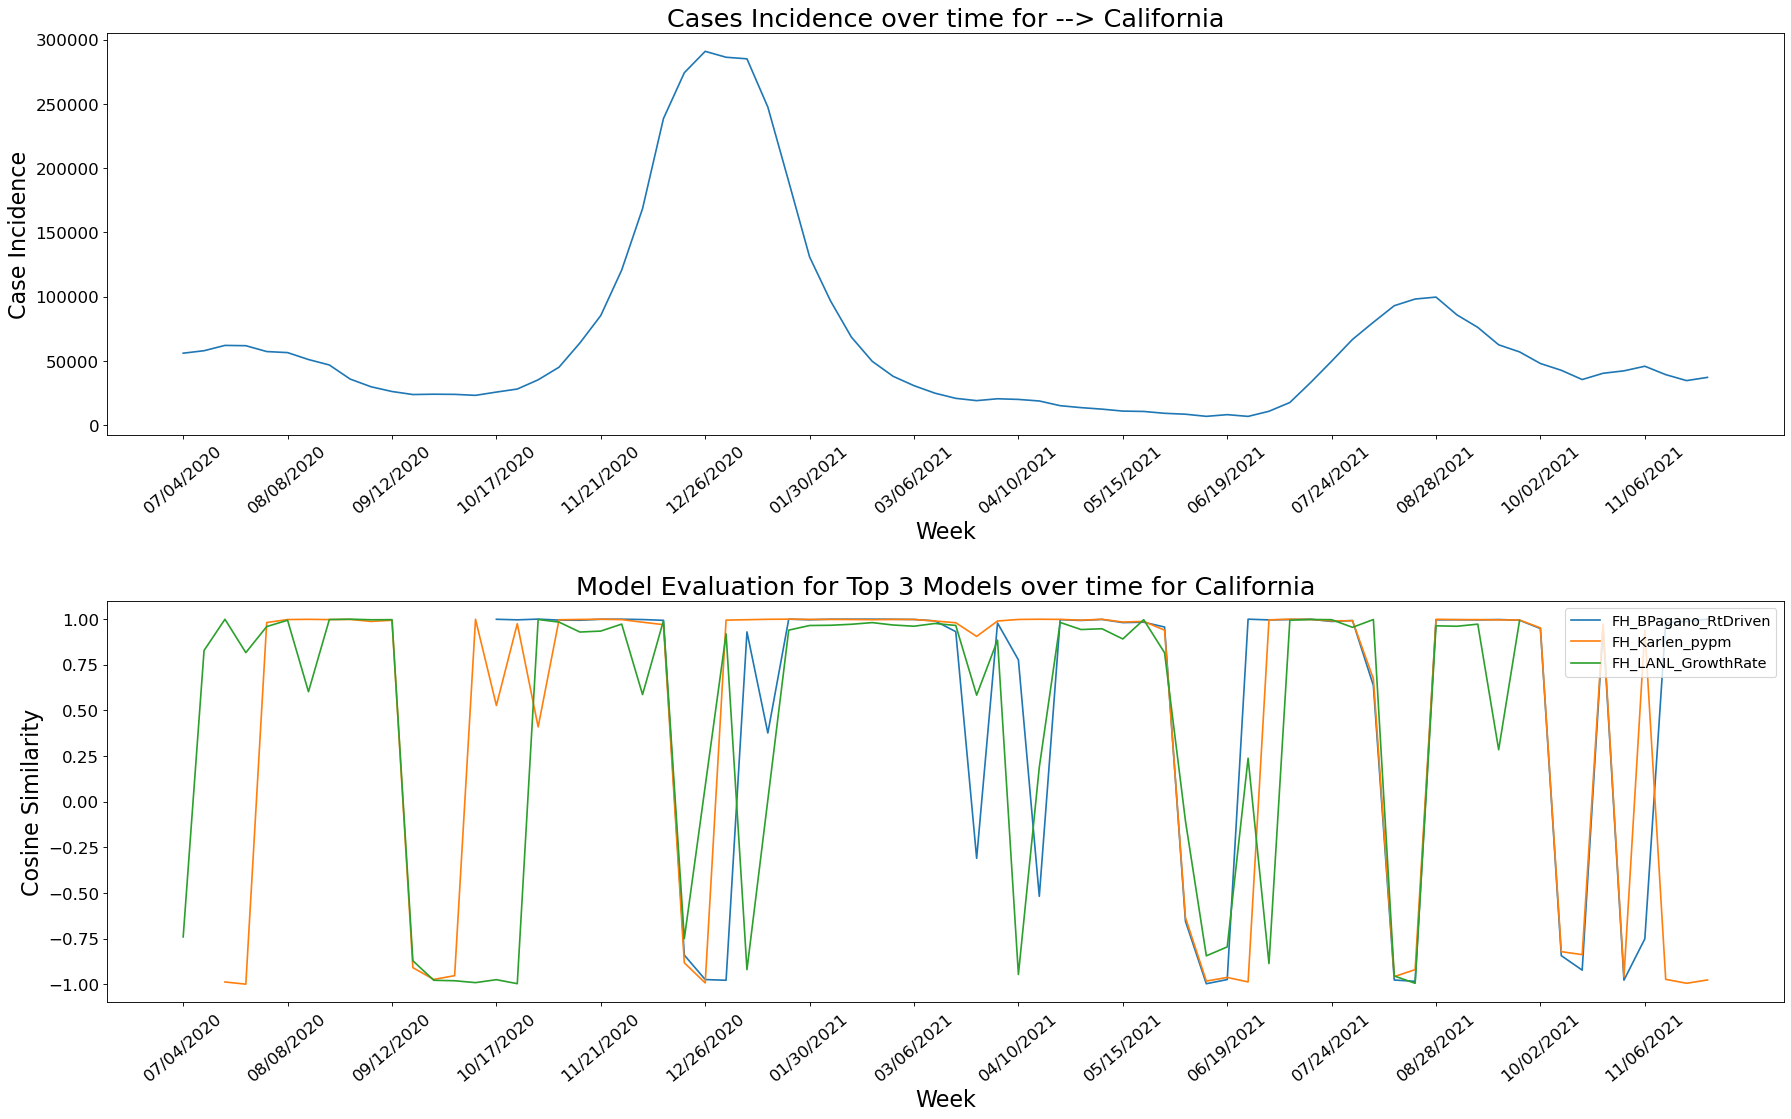

length of x1 57
length of x11 71


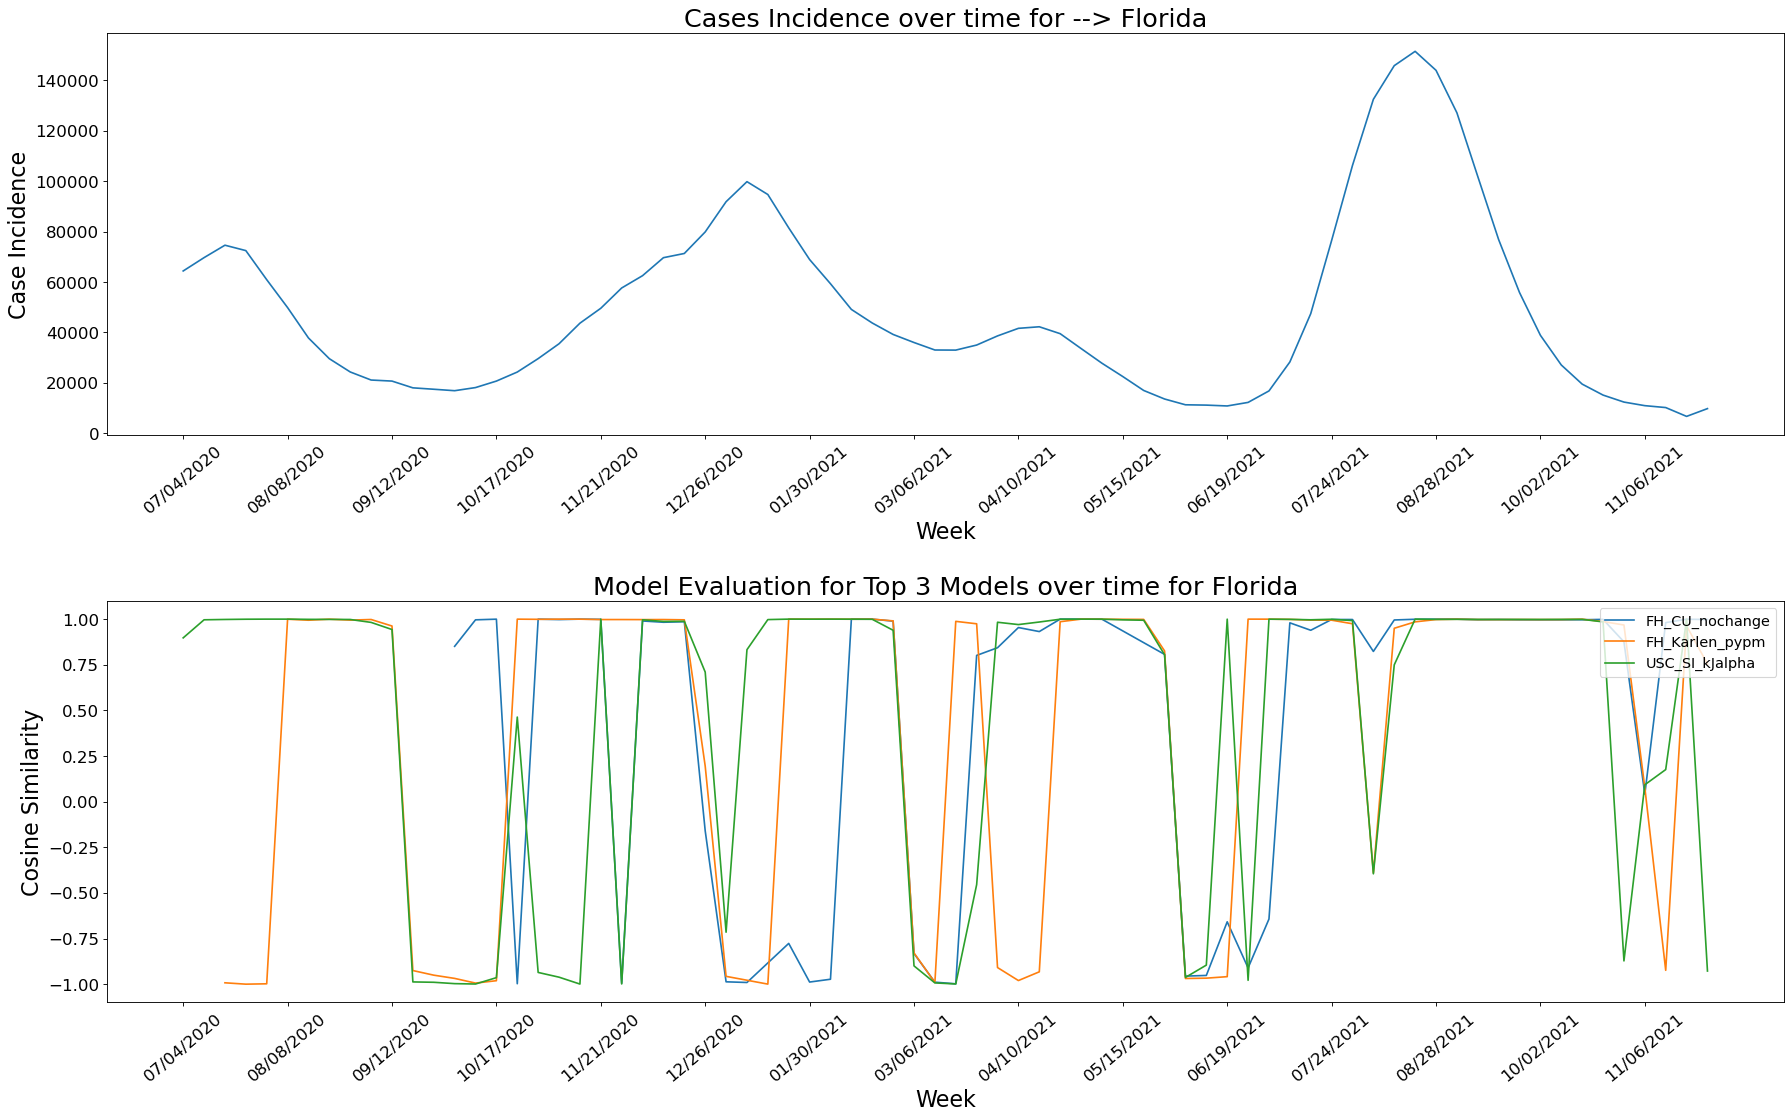

In [3]:
state_lst = State_list_plotting[:]

for state in state_lst:
    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    fig, axs = plt.subplots(2,figsize=(25,16 ), dpi=80)

    fig.tight_layout(pad=13.0)

    subset_data = plot_results_softmax[plot_results_softmax['State_x']==state].drop_duplicates(['Week Number','Label_Actual_x'])
    Actual_Case_cnt = (subset_data['Covid_case_count']/subset_data['Count_overall']).to_list()

    Predicted_label = subset_data['Predicted'].to_list()

    Actual_Label = subset_data['Label_Actual_x'].to_list()
    
    
    Week_nbr = subset_data['Week Number'].to_list()
    Week_nbr2 = Week_nbr[:]
    str_week_int = []
    str_week = []
    for i in range(0,len(Week_nbr),5):
        str_week_int.append(Week_nbr[i])
        str_week.append(date_formatting(Week_nbr[i]))

#         print(len(Week_nbr))

    axs[0].plot(Week_nbr,Actual_Case_cnt)
    axs[0].set_xlabel('Week', fontsize = 20)
    axs[0].set_ylabel('Case Incidence', fontsize = 20)
    
#     axs[0].set(xlabel="Week", ylabel="Covid Case Count")

    axs[0].set_title(Runtype+" Incidence over time for --> "+state,fontsize=23)
    axs[0].set_xticks(str_week_int)
    axs[0].set_xticklabels(str_week,rotation=40,fontsize=15)
    axs[0].yaxis.set_tick_params(labelsize=15)
    
    lgh = -999
    wek = None

    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    subset_1 = subset[subset['Model Name']==model_list[state][0]]
    
    x1 = subset_1['Week Number'].values
    
    y1 = subset_1['Cosine Similarty'].values
    
    if len(x1)>lgh:
        print("length of x1",len(x1))
        lgh = x1
        wek = x1
#     print
    vectors = list(zip(x1,y1))

    vector_sorted = sorted(vectors,key = lambda x : x[0]) 

    x = [w[0] for w in vector_sorted ]
    y = [w[1] for w in vector_sorted ]
    Week_nbr = x

    usc = axs[1].plot(x,y,label=model_list[state][0])


    axs[1].set_xlabel('Week', fontsize = 20)
    axs[1].set_ylabel('Cosine Similarity', fontsize = 20)
    
    
#     usc = axs[2].set(xlabel="Week", ylabel="Cosine Similarity",label = "USC Shapelet Ensemble")

    axs[1].set_title("Model Evaluation for Top 3 Models over time for {}".format(state),fontsize=23)
#         plt.show()

    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    subset_1 = subset[subset['Model Name']==model_list[state][1]]
    
    x11 = list(subset_1['Week Number'].values)
    print("length of x11",len(x11))
    y11 = subset_1['Cosine Similarty'].values
    if len(x11)>len(lgh):
        lgh = x11
        wek = x11

    
    vectors = list(zip(x11,y11))

    vector_sorted = sorted(vectors,key = lambda x : x[0]) 

    x = [w[0] for w in vector_sorted ]
    y = [w[1] for w in vector_sorted ]
    Week_nbr = x

    ensemble  = axs[1].plot(x,y,label=model_list[state][1])
    
    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    subset_1 = subset[subset['Model Name']==model_list[state][2]]
    
    x12 = list(subset_1['Week Number'].values)
    
    y12 = subset_1['Cosine Similarty'].values
    if len(x12)>len(lgh):
        lgh = x12
        wek = x12
    
    
    vectors = list(zip(x12,y12))

    vector_sorted = sorted(vectors,key = lambda x : x[0]) 

    x = [w[0] for w in vector_sorted ]
    y = [w[1] for w in vector_sorted ]
    Week_nbr = x

    ensemble2  = axs[1].plot(x,y,label=model_list[state][2])

#     axs[2].legend((usc,ensemble),('Perfis COPEX','Media'), loc = 'best')
    leg1 = axs[1].legend(loc='upper right',prop={'size': 13})
    
    str_week_int = []
    str_week = []
    for i in range(0,len(Week_nbr2),5):
        str_week_int.append(Week_nbr2[i])
        str_week.append(date_formatting(Week_nbr2[i]))
    axs[1].set_xticks(str_week_int)
    axs[1].set_xticklabels(str_week,rotation=40,fontsize=15)
    axs[1].yaxis.set_tick_params(labelsize=15)

    if export_visualizations:
        plt.savefig(Visualization_path+"PlotType : "+Runtype+" "+'Model_Evaluation Plot for Top3 Models '+state+'.png')
    else:
        plt.show()

## End of Notebook

Author Details :

Satwant Singh : satwants@usc.edu



## Appendix 

Below codes are useful in generating some interesting visualizations



### 1) Aggrement between models over time for given state. Also Covid-19 Case/death incidence data is plotted to visualize better



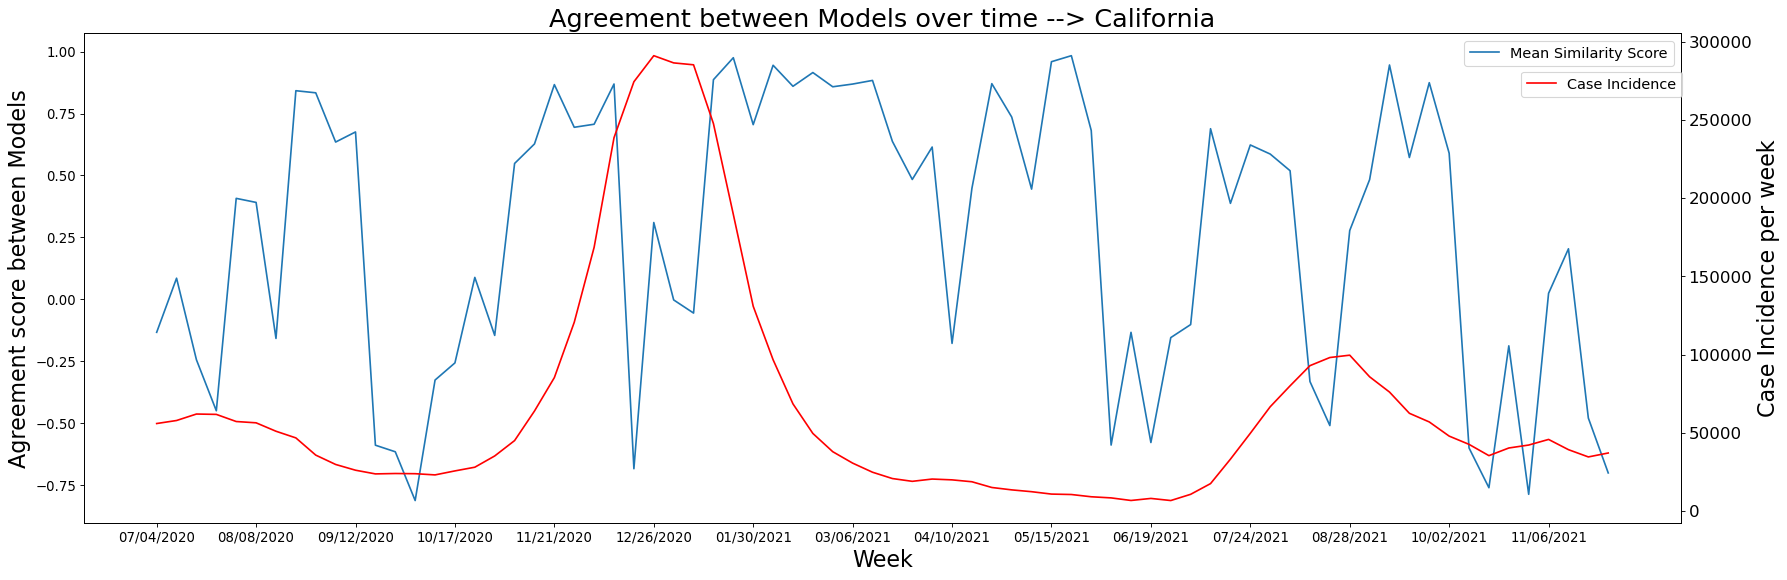

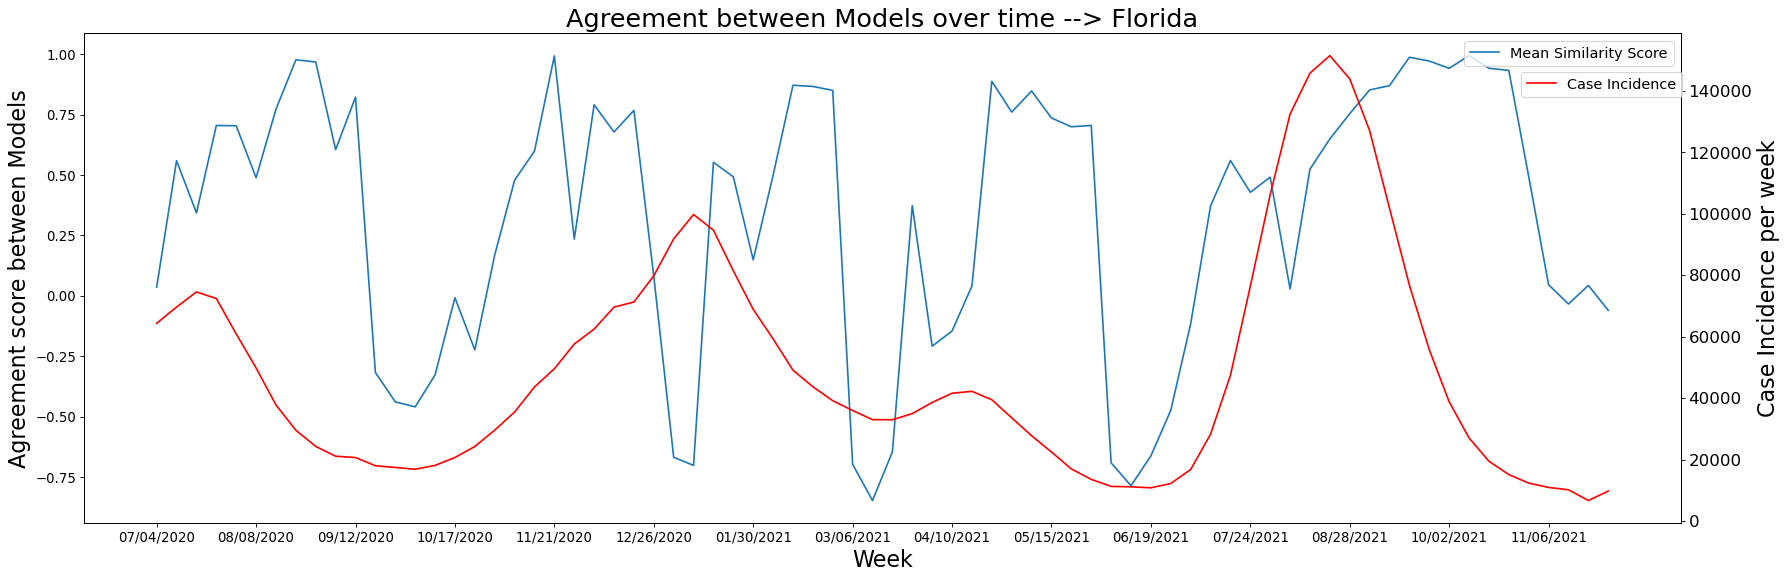

In [4]:
state_lst = State_list_plotting[:]

for state in state_lst:
    model = "USC shapelet-ensemble"
#     if state not in ['California','United States']:
#         continue
    subset = Master_df_actual_VS_Model_Agrrement[Master_df_actual_VS_Model_Agrrement['State']==state]
    fig, axs = plt.subplots(1,figsize=(24,10 ), dpi=80)

    fig.tight_layout(pad=13.0)

    subset_data = plot_results_softmax[plot_results_softmax['State_x']==state].drop_duplicates(['Week Number','Label_Actual_x'])
    Actual_Case_cnt = (subset_data['Covid_case_count']/subset_data['Count_overall']).to_list()

    Predicted_label = subset_data['Predicted'].to_list()

    Actual_Label = subset_data['Label_Actual_x'].to_list()

    Week_nbr = subset_data['Week Number'].to_list()
    str_week_int = []
    str_week = []
    for i in range(0,len(Week_nbr),5):
        str_week_int.append(Week_nbr[i])
        str_week.append(date_formatting(Week_nbr[i]))

#         print(len(Week_nbr))
    a2 = axs.twinx()
    q = a2.plot(Week_nbr,Actual_Case_cnt,label="Case Incidence",color="red")
#     a2.set_xlabel('Week', fontsize = 20)
    a2.set_ylabel('Case Incidence per week', fontsize = 20)
    
#     axs[0].set(xlabel="Week", ylabel="Covid Case Count")

#     axs[0].set_title(Runtype+" Incidence over time for --> "+state,fontsize=23)
    a2.set_xticks(str_week_int)
    a2.set_xticklabels(str_week,rotation=40,fontsize=15)
    a2.yaxis.set_tick_params(labelsize=15)
#     axs[0].set_yticklabels(fontsize=13)
#     axs[0].set_yticks(Actual_Case_cnt)
#     axs[0].set_yticklabels(Actual_Case_cnt,fontsize=13)
    
    
    subset = MeanSimilarityModels[MeanSimilarityModels['State']==state]

    week_nbrs = list(subset['Week Number'].values)

    meanS_miliary = subset['Mean_Similarity'].values
    
    b = axs.plot(week_nbrs,meanS_miliary,label="Mean Similarity Score")
    axs.set_xlabel('Week', fontsize = 20)
    axs.set_ylabel('Agreement score between Models', fontsize = 20)
    axs.yaxis.set_tick_params(labelsize='large')
    axs.xaxis.set_tick_params(labelsize='large')
#     axs.xtick.labelsize(20)
#     axs.xaxis.set_size(20)
#     axs.set_yticklabels(fontsize=13)

#     axs[1].set(xlabel="Week Number", ylabel="Agreement score between Models")

    axs.set_title("Agreement between Models over time --> "+state,fontsize=23)
    
    leg1 = axs.legend(loc='upper right',prop={'size': 13})
    leg1 = a2.legend(loc=(0.90, 0.87),prop={'size': 13})
    if export_visualizations:
    
        plt.savefig(Visualization_path+"Agrrement_score_Paper_"+state+".png")
    else:
        plt.show()


### 2) Shapelet Label Annotation plotted with Covid-19 Case/Death incidence data plotted to verify annotation method quality

California


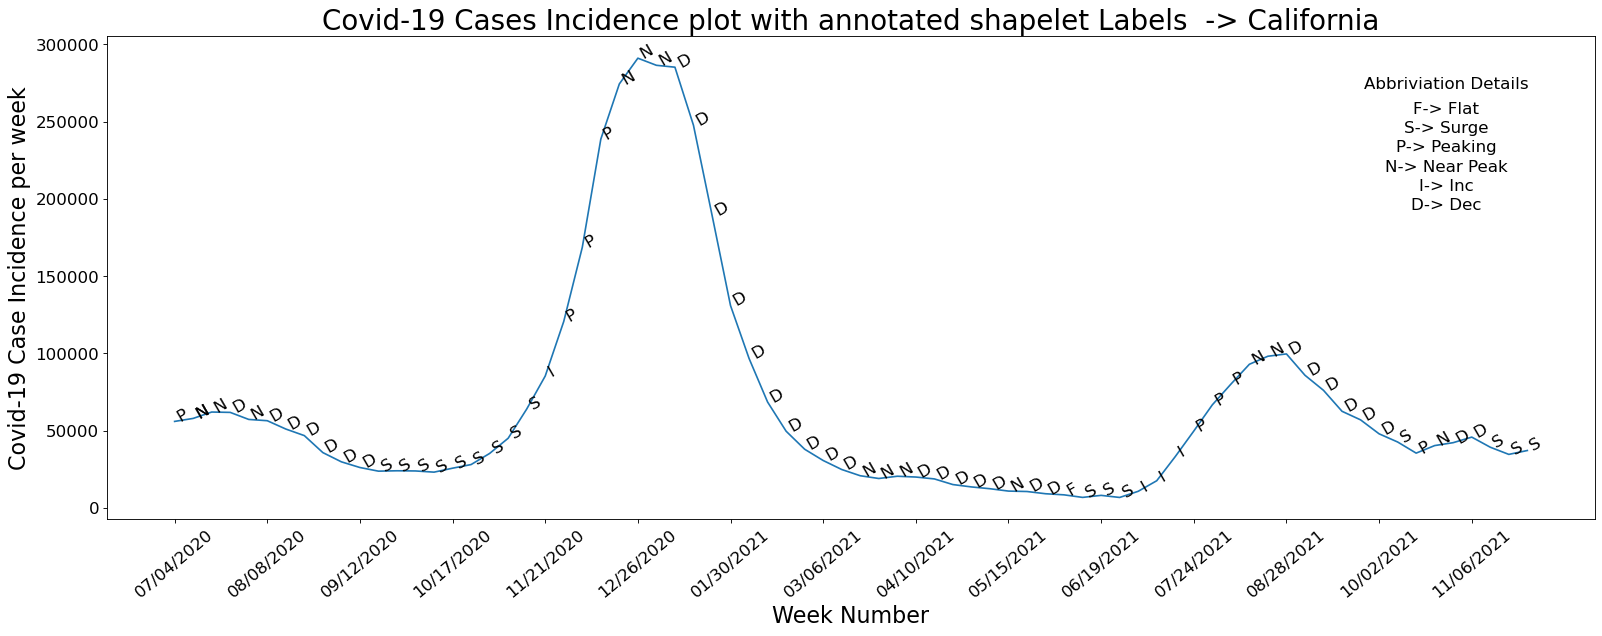

Florida


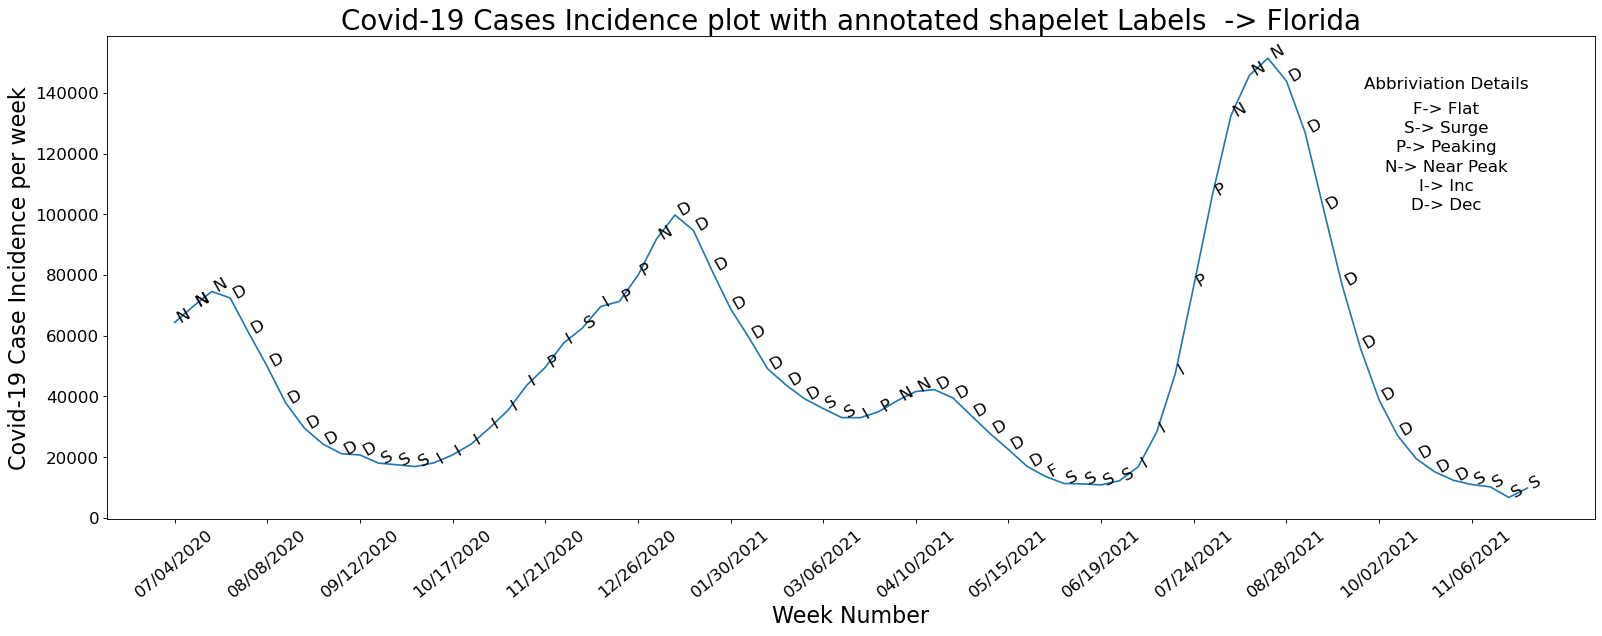

states


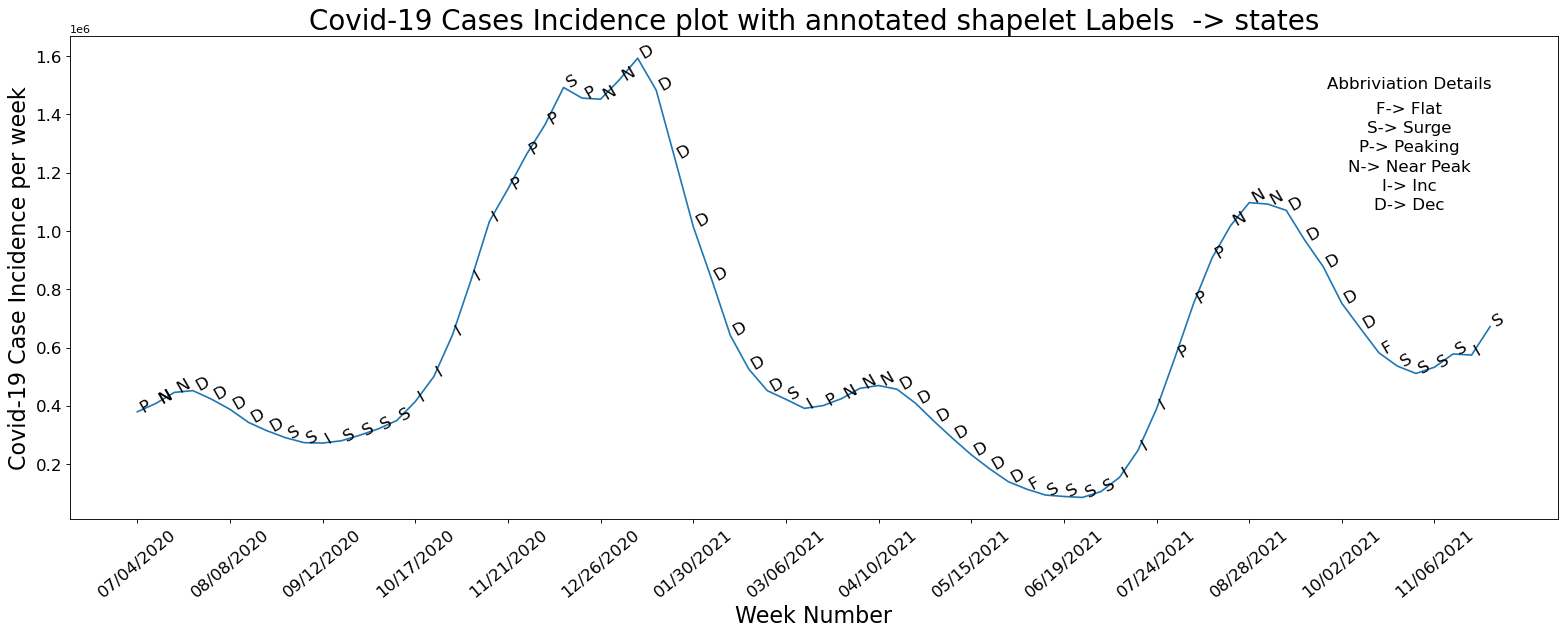

In [5]:
ShapeLet_Dictionary_State_level = {}

Shapelet_dict_actual_state_week_vector_label = {}

for keys in running_average.keys():
    
    State_name = keys
    if keys in Ignore_State_list:
        continue
    print(keys)
    running_avg = running_average[State_name]



    running_avg_vectors = []
    for i in range(len(running_avg)):
        if i<len(running_avg)-4:
            if i<=history_weeks:
                vec = running_avg[i:i+future_weeks+history_weeks]
            else:
                vec = running_avg[i-history_weeks:i+future_weeks]
#             vec = running_avg[i-history_weeks:i+future_weeks]
            vec1 = [w[1] for w in vec]

            week_nbr = vec[0][0]
            running_avg_vectors.append((week_nbr,vec1[0],vec1))

    dicy_state = Shapelet_dict_actual_state_week_vector_label.get(State_name,{})
#     print(dicy_state)
    
    scenarios_list_pearson_perason = [(vector[0],vector[1],return_best_shapelet_pearson(vector[2]),return_all_shapelet_pearson(vector[2])) for vector in running_avg_vectors]
    scenes_dict= {}
    for index,val in enumerate(list(set([w[2] for w in scenarios_list_pearson_perason]))):
        scenes_dict[val] = val[0]
    
    for vector in scenarios_list_pearson_perason:
        dicy_state[vector[0]] = [(vector[3],vector[2])]
    Shapelet_dict_actual_state_week_vector_label[State_name] = dicy_state
        

    ShapeLet_Dictionary_State_level[keys] = scenarios_list_pearson_perason

    ## Actual Covid tally plot validation 

    week_nbr_plt = [w[0] for w in scenarios_list_pearson_perason]
    actual_count_plt = [w[1] for w in scenarios_list_pearson_perason]
    labels_plt = [w[2] for w in scenarios_list_pearson_perason]


#     fig, ax = plt.subplots()
    fig, axs = plt.subplots(1,figsize=(24,8 ), dpi=80)
#     figure(figsize=(24,8 ), dpi=80)
    Week_nbr2 = week_nbr_plt
    str_week_int = []
    str_week = []
    for i in range(0,len(Week_nbr),5):
        str_week_int.append(Week_nbr[i])
        str_week.append(date_formatting(Week_nbr[i]))

    axs.plot(week_nbr_plt,actual_count_plt)
    axs.set_xticks(str_week_int)
    axs.set_xticklabels(str_week,rotation=40,fontsize=15)
    axs.yaxis.set_tick_params(labelsize=15)
#     plt.se
    axs.set_xlabel('Week Number', fontsize = 20)
    axs.set_ylabel('Covid-19 Case Incidence per week', fontsize = 20)

#     axs.setxlabel("Week Number")
#     axs[0].ylabel("Covid-19 Case Volume")
    axs.set_title("Covid-19 "+Runtype+" Incidence plot with annotated shapelet Labels  -> {}".format(State_name),fontsize=25)
    
#     scenarios_list_pearson_perason_1 = sample(scenarios_list_pearson_perason,math.ceil(len(scenarios_list_pearson_perason)*0.95))
    for index,val in enumerate(scenarios_list_pearson_perason):
#         if index%2==0:
#             continue
        axs.text(val[0],val[1],scenes_dict[val[2]],fontsize=15,rotation=30)
    axs.text(0.9, 0.9,'Abbriviation Details',\
    horizontalalignment='center',\
    verticalalignment='center', transform = axs.transAxes,fontsize=15) 
    step=-0.1
    cnt=0
    for k11,v11 in scenes_dict.items():
        axs.text(0.9, 0.85+cnt*step,v11+ "-> "+k11,\
        horizontalalignment='center',\
        verticalalignment='center',transform = axs.transAxes,fontsize=15)  
        cnt+=0.4
    if export_visualizations:
        plt.savefig(Visualization_path+'Type : '+Runtype+'Shapelets_actual_cases_'+State_name+'.png')
    else:
        plt.show()

In [6]:
## Evaluation Files Generation

In [7]:
def date_formatting(week_nbr):
# week_nbr = 164
    t = 'Jan 22 2020'
    format = '%b %d %Y'
    now = datetime.strptime(t,format)
    after = now + timedelta(days = int(week_nbr))
    return after.date().strftime("%Y-%m-%d")

Master_df_actual_VS_Model_Agrrement['forecast_target_week'] = Master_df_actual_VS_Model_Agrrement['Week Number'].apply(date_formatting)



In [8]:

Evaluation_file_tmp = Master_df_actual_VS_Model_Agrrement[['Model Name','State','forecast_target_week','Cosine Similarty']]


In [9]:
iterations = Evaluation_file_tmp['State'].unique()
for state in iterations:
    subset = Evaluation_file_tmp[Evaluation_file_tmp['State']==state]
    subset.set_index("Model Name")
    df_evaluation = pd.pivot_table(subset, values = 'Cosine Similarty', index=['Model Name'], columns = 'forecast_target_week').reset_index()
    df_evaluation.fillna("",inplace=True)
    df_evaluation = df_evaluation.set_index("Model Name")
    df_evaluation.index.name = None
    df_evaluation = df_evaluation.rename_axis(None, axis=1)
    if Runtype=='Cases':
        df_evaluation.to_csv(Evaluation_files_github+"Cases/scs_avg_"+state+".csv")
    else:
        df_evaluation.to_csv(Evaluation_files_github+"Deaths/scs_avg_"+state+".csv")
        
        

In [10]:
! ls ../../Data_Sources

Cases                  Evaluation
Deaths                 quantile_preprocessing


In [11]:
Evaluation_files_github

'../../Data_Sources/Evaluation/'